In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [71]:
data = pd.read_csv(r'data_center\ex2data1.txt')
data.info()
data.head().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   34.62365962451697  99 non-null     float64
 1   78.0246928153624   99 non-null     float64
 2   0                  99 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


,0,1,2,3,4
34.62365962451697,30.286711,35.847409,60.182599,79.032736,45.083277
78.0246928153624,43.894998,72.902198,86.308552,75.344376,56.316372
0,0.000000,0.000000,1.000000,1.000000,0.000000


Je suppose vais faire des suppositions, 
Colonne 0 : premier examen
Colonne 1 : deuxième examen
Colonne 2 : 0 pas admis et 1 admis

In [72]:
df = pd.read_csv(r'data_center\ex2data1.txt', header=None, names=["exam1", "exam2", "resultat"])
df.head(100)


,exam1,exam2,resultat
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [73]:
print(df.isnull().sum())

exam1       0
exam2       0
resultat    0
dtype: int64


In [74]:
#On sépare les groupes
df_0 = df[df["resultat"] == 0]
df_1 = df[df["resultat"] == 1]

print(len(df_0), len(df_1))

40 60


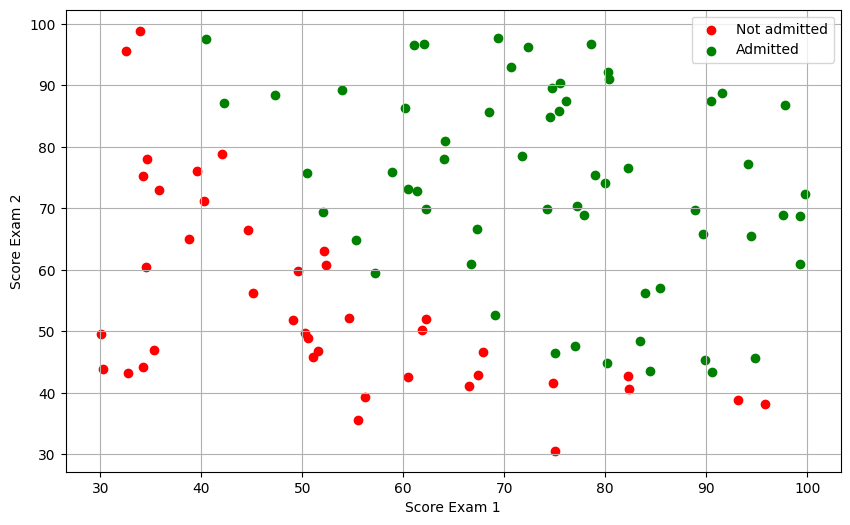

In [75]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.scatter(df_0['exam1'],df_0['exam2'], color='red',label='Not admitted')
    plt.scatter(df_1['exam1'],df_1['exam2'], color='green',label='Admitted')
    plt.xlabel('Score Exam 1')
    plt.ylabel('Score Exam 2')
    plt.legend()
    plt.grid(True)
    
plotData()

In [76]:
df_0_sample = df_0.sample(n=40, random_state=18)
df_1_sample = df_1.sample(n=40, random_state=18)

#Sample à 50/50
df_sample = pd.concat([df_0_sample, df_1_sample]).reset_index(drop=True)

In [77]:
# Préparation des entrées et des sorties

X = df[["exam1", "exam2"]]
y = df["resultat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [78]:
# Entrainement du modèle

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [79]:
y_pred = model.predict(X_test)

print("Précision :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n") 
print(classification_report(y_test, y_pred))

Précision : 0.9

Rapport de classification :

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



Nous avons une précision de 90.00% ce qui est beaucoup
Sachant que nous avons que 100 personnes pour le sample, il serait bon d'avoir plus de données pour permettre une meilleure décision concernant le modèle.

Le modèle affiche une précision globale de 0.90 et une exactitude (accuracy) de 90 %, ce qui traduit une bonne performance globale.

    La classe 0 est prédite avec une précision parfaite (1.00), mais un rappel plus faible (0.78) : le modèle est donc très fiable quand il prédit un 0, mais il en manque quelques-uns (faux négatifs).

    À l’inverse, la classe 1 est parfaitement détectée (rappel de 1.00), mais avec une précision légèrement plus basse (0.85), ce qui indique la présence de faux positifs pour cette classe.

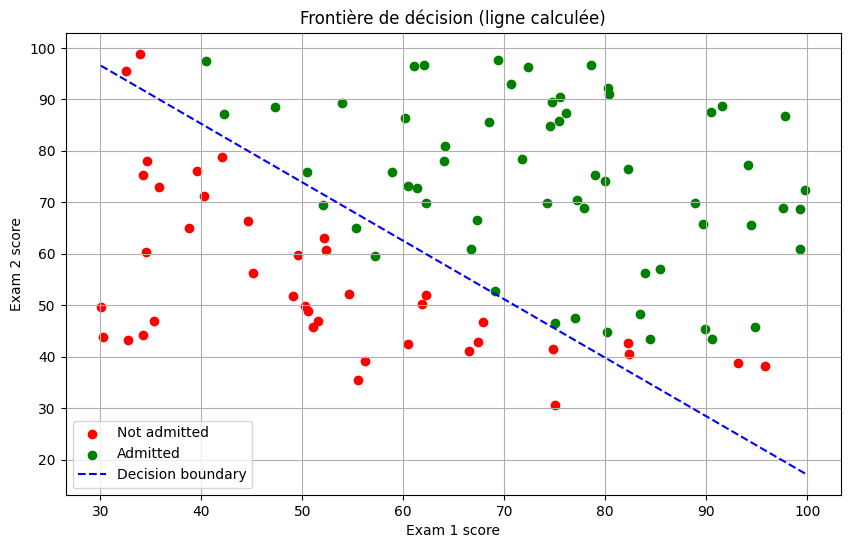

In [94]:
def plotDecisionBoundary_with_line(model, X, y):
    plt.figure(figsize=(10,6))

    # Points
    plt.scatter(X[y==0]["exam1"], X[y==0]["exam2"], c='red', label='Not admitted')
    plt.scatter(X[y==1]["exam1"], X[y==1]["exam2"], c='green', label='Admitted')

    # Droite de décision : x2 = -(theta0 + theta1*x1)/theta2
    coef = model.coef_[0]
    intercept = model.intercept_[0]
    
    x_vals = np.array([X["exam1"].min(), X["exam1"].max()])
    y_vals = -(intercept + coef[0] * x_vals) / coef[1]

    plt.plot(x_vals, y_vals, 'b--', label='Decision boundary')

    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.title("Frontière de décision (ligne calculée)")
    plt.legend()
    plt.grid(True)
    plt.show()

plotDecisionBoundary_with_line(model, X, y)

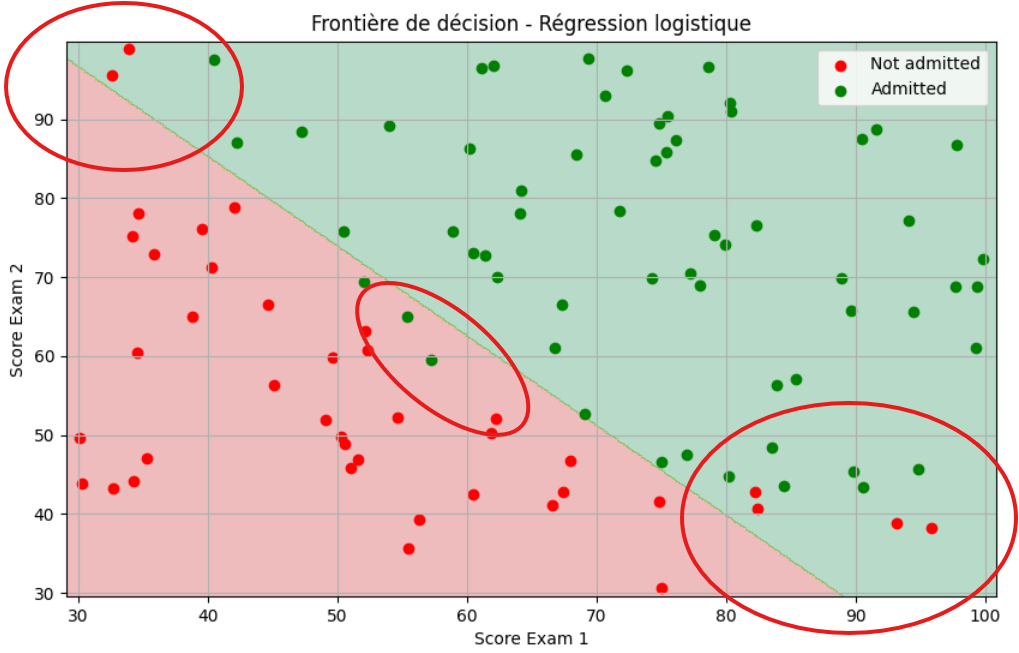

Nous voyons dans les cercles les zones d'incertitudes.

C'est probablement que nous avons pas assez de paramètres afin de d'avoir suffisament d'indices pour permettre d'avoir un modèle qui répond au modèle.
par exemple des notes éliminiatoires, le comportement en cours?
Une possibilité est que nous ayons pas toutes les notes concernant ces examens

In [ ]:
# Etudiant non reçut pour test
etudiant = pd.DataFrame([[30, 40]], columns=["exam1", "exam2"])

# 2. Utiliser le modèle pour prédire
prediction = model.predict(etudiant)

# 3. Afficher le résultat
print("Résultat prédit :", "Admis" if prediction[0] == 1 else "Non admis")
prob = model.predict_proba(etudiant)
print(f"Probabilité d'être admis : {prob[0][1]*100:.2f}%")

Résultat prédit : Non admis
Probabilité d'être admis : 0.00%


In [96]:
# Etudiant con
etudiant = pd.DataFrame([[57, 60]], columns=["exam1", "exam2"])

# 2. Utiliser le modèle pour prédire
prediction = model.predict(etudiant)

# 3. Afficher le résultat
print("Résultat prédit :", "Admis" if prediction[0] == 1 else "Non admis")
prob = model.predict_proba(etudiant)
print(f"Probabilité d'être admis : {prob[0][1]*100:.2f}%")

Résultat prédit : Non admis
Probabilité d'être admis : 24.56%


Pourtant l'étudiant à été admis (centre du cercle du milieu)